# Well Data and Visualization in Python

Log ASCII Standard (LAS) files is an Oil & Gas (Energy) industry formatted file use for storing and transferring well log data. 
Importing other Libraries: pandas, matplotlib, seaborn, welly and lasio.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import welly

In [3]:
las = lasio.read("C:/Users/Ayomide/Downloads/Python Github Excerise/DATA/CWLS log ASCII Standard.las")
well = las.df()
well.head()

,TENS,SPA,GR,NPHI,NDSN,FDSN,NRAT,HDRS,HMRS,HDCN,DFL,RHOB,DRHO,PE,QF,QN,DPHI,CALI
DEPT,,,,,,,,,,,,,,,,,,
98.0,1077.9718,NaN,52.2769,NaN,11995.7637,1393.9622,9.1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98.5,1076.9663,NaN,52.4194,NaN,12036.0391,1416.2161,8.9957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.0,1075.9608,NaN,55.1433,NaN,12056.6045,1480.0898,8.6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.5,1074.7878,NaN,56.1569,NaN,12070.4121,1557.4714,8.1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100.0,1073.7822,NaN,56.5053,NaN,12047.2441,1578.5347,8.0718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To view what curves are present within the las file.

In [4]:
print(las.curves)

Mnemonic  Unit  Value           Description                   
--------  ----  -----           -----------                   
DEPT      F     00 000 000 000                                
TENS      LBS   00 000 000 000  CABLE TENSION                 
SPA       MV    00 000 000 000  ANALOG SPONTANEOUS POTENTIAL  
GR        GAPI  00 000 000 000  NATURAL GAMMA                 
NPHI      DECP  00 000 000 000  NEUTRON POROSITY              
NDSN      CPS   00 000 000 000  DSN NEAR COUNTS               
FDSN      CPS   00 000 000 000  DSN FAR COUNTS                
NRAT      C/C   00 000 000 000  DSN (NDSN/FDSN) RATIO         
HDRS      OHMM  00 000 000 000  HRI DEEP RESISTIVITY          
HMRS      OHMM  00 000 000 000  HRI MEDIUM RESISTIVITY        
HDCN      MMHO  00 000 000 000  HRI DEEP CONDUCTIVITY         
DFL       OHMM  00 000 000 000  DIGITALLY FOCUSED LATEROLOG   
RHOB      G/CC  00 000 000 000  BULK DENSITY                  
DRHO      G/CC  00 000 000 000  DENSITY CORRECTION     

In [5]:
## `las.index` function shows the array of depth values
las.index

array([   98. ,    98.5,    99. , ..., 10705. , 10705.5, 10706. ])


Creating a Pandas Dataframe

<AxesSubplot:>

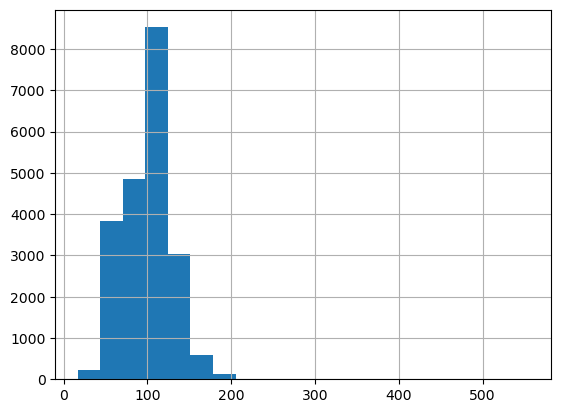

In [6]:
well.GR.hist(bins=20)

<AxesSubplot:xlabel='NPHI', ylabel='RHOB'>

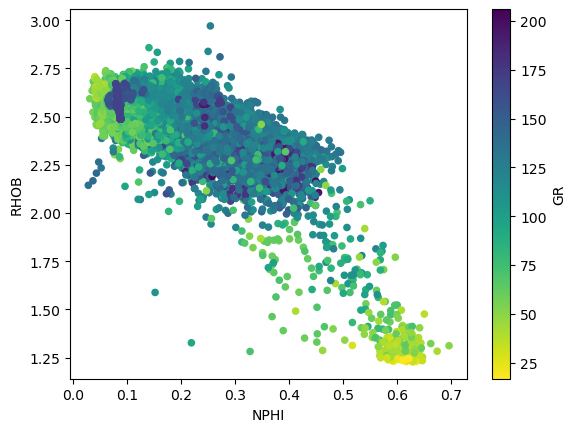

In [7]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='GR', colormap='viridis_r')

### Welly for file manipulation and plotting


In [8]:
from welly import Well
from welly import Project
well = Well.from_las("C:/Users/Ayomide/Downloads/Python Github Excerise/DATA/CWLS log ASCII Standard.las")

In [9]:
well

Well(uwi: '05045113040000', name: 'HM 443-23', 18 curves: ['TENS', 'SPA', 'GR', 'NPHI', 'NDSN', 'FDSN', 'NRAT', 'HDRS', 'HMRS', 'HDCN', 'DFL', 'RHOB', 'DRHO', 'PE', 'QF', 'QN', 'DPHI', 'CALI'])

In [10]:
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS log ASCII Standard -VERSION 2.0,Version
1,WRAP,WRAP,,NO,One line per depth step,Version
2,STRT,STRT,F,98.0,,Well
3,STOP,STOP,F,10706.0,,Well
4,STEP,STEP,F,0.5,,Well
...,...,...,...,...,...,...
151,DFL,DFL,,4.8,DRILLING FLUID LOSS,Parameter
152,DFPH,DFPH,,10.0,DRILLING FLUID PH,Parameter
153,DFV,DFV,,120,DRILLING FLUID VISCOSITY,Parameter
154,LUN,LUN,,49593,LOGGING UNIT NUMBER,Parameter


In [11]:
##  variable GR is the range of information about the GR curve from the welly data function
gr = well.data['GR'] 
gr

Curve(mnemonic=GR, units=GAPI, start=98.0000, stop=10706.0000, step=0.5000, count=[21217])

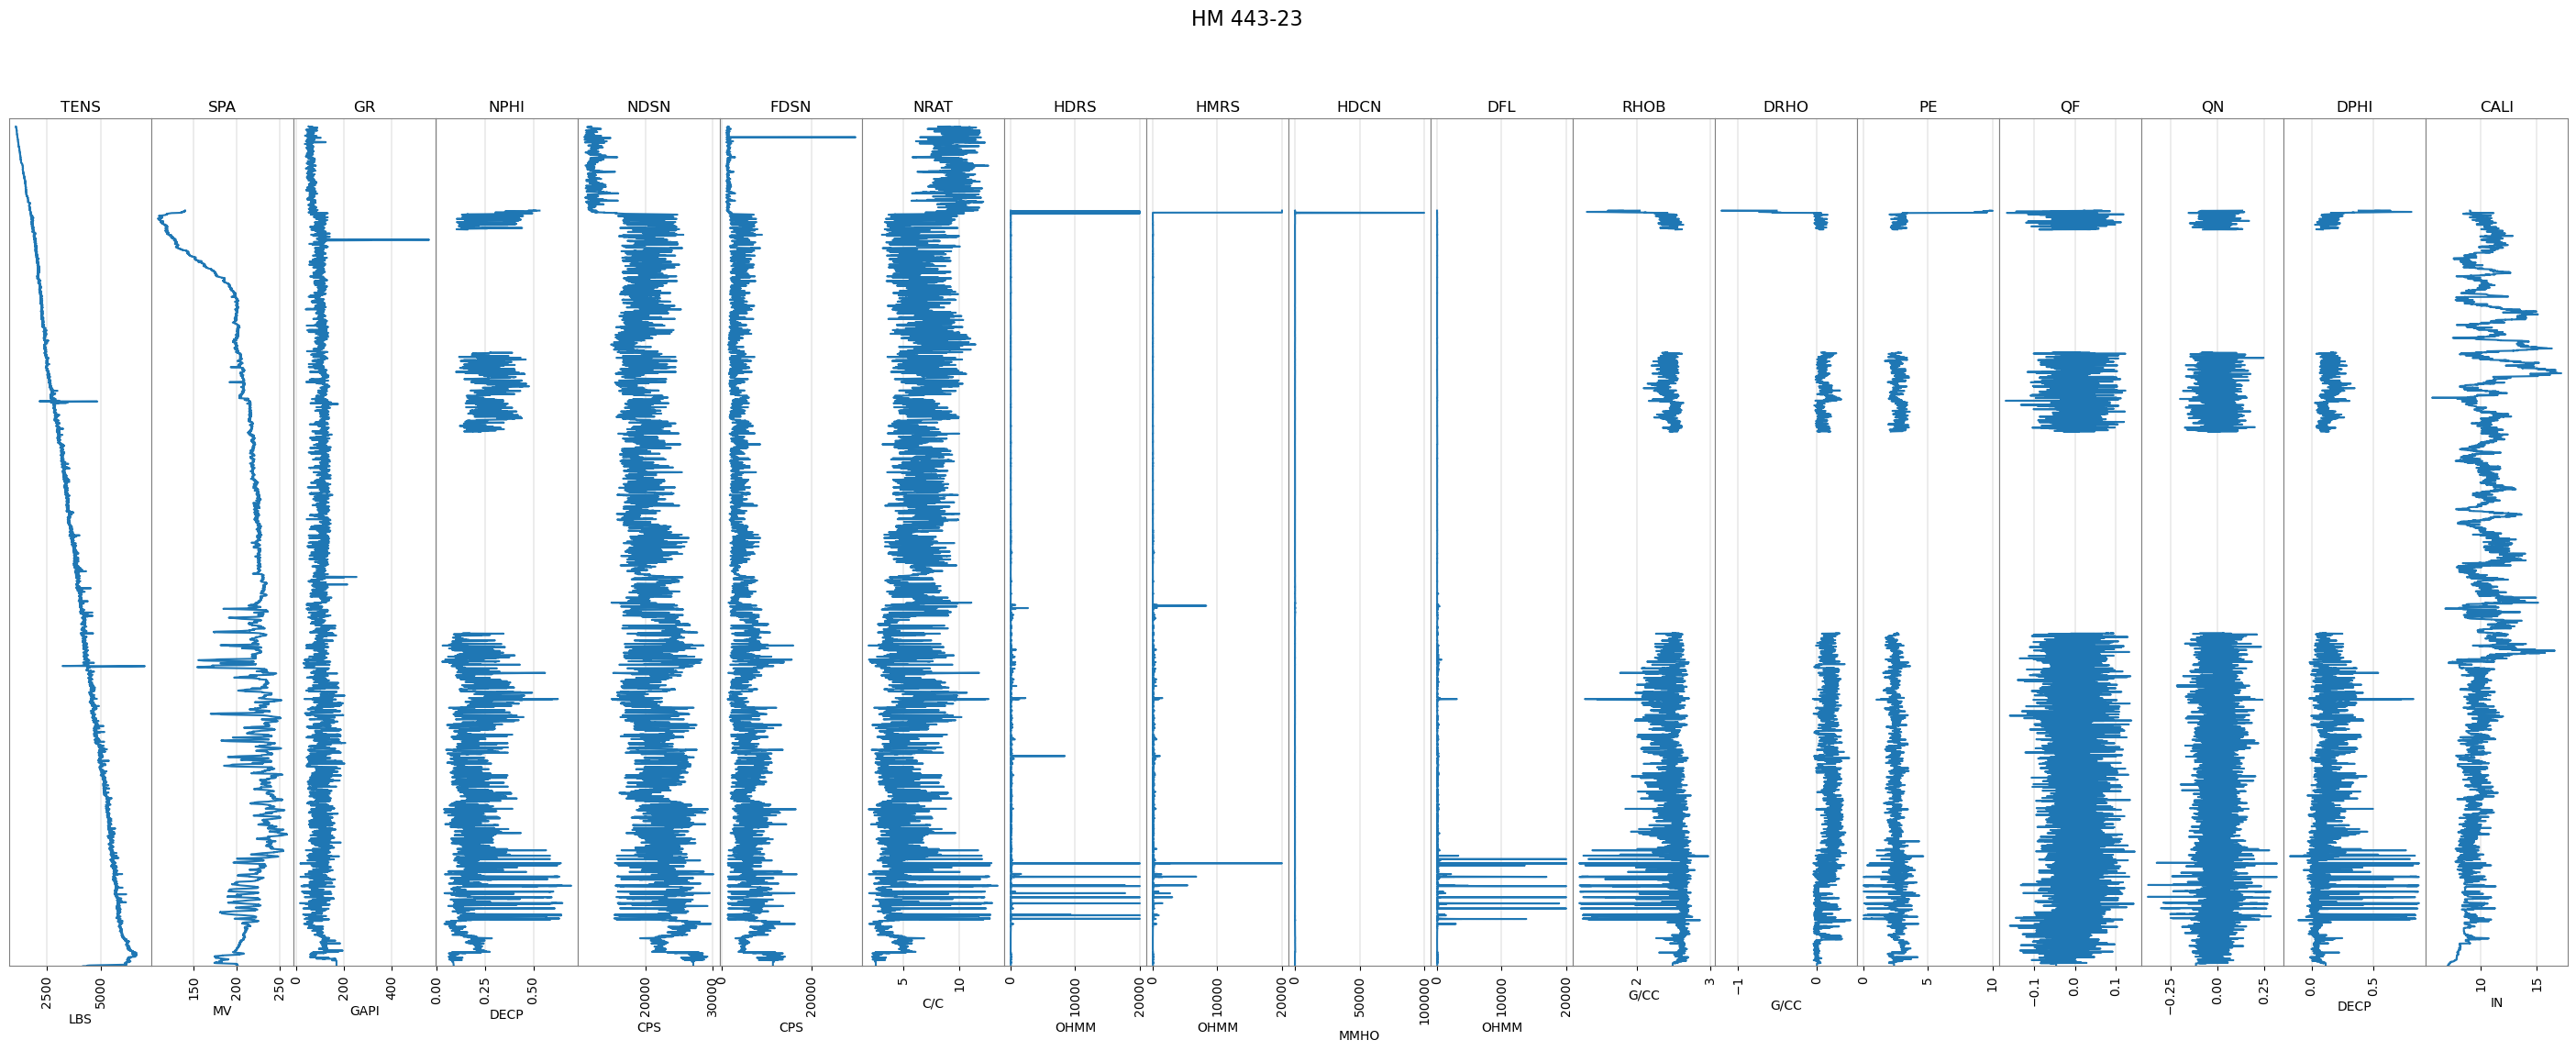

In [12]:
well.plot()

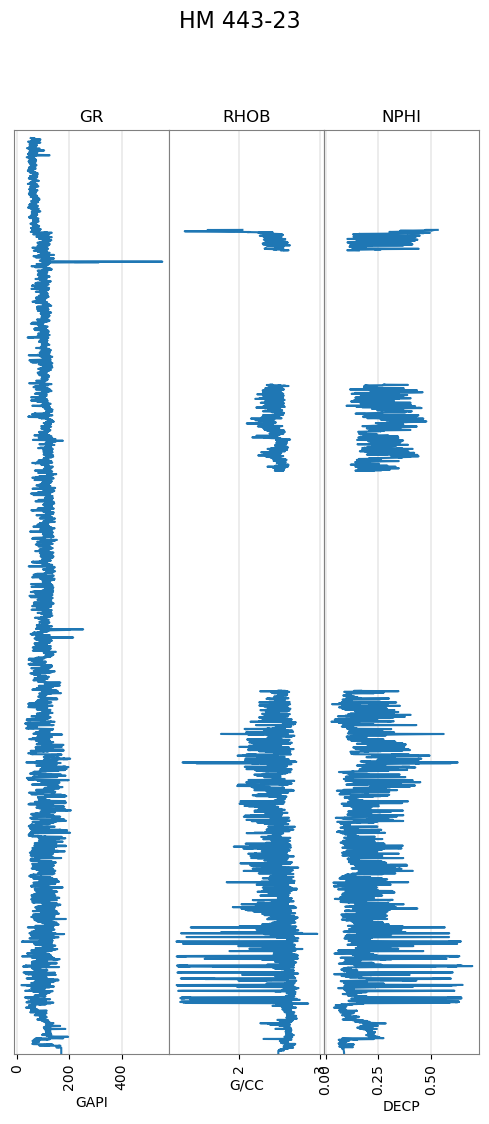

In [13]:
##  plots list of tracks

tracks=['GR','RHOB','NPHI']
well.plot(tracks = tracks)

<AxesSubplot:>

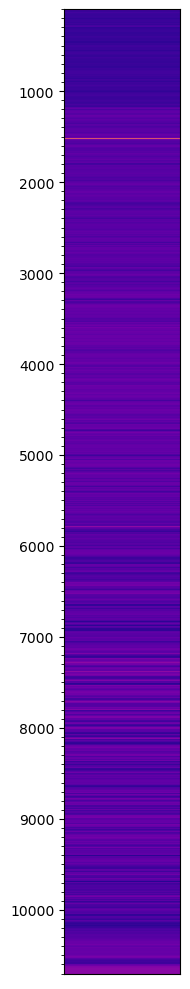

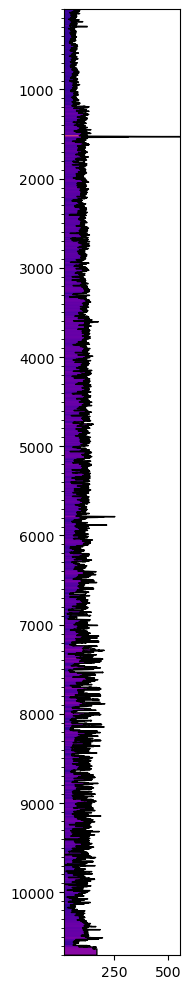

In [14]:
## Showing the 2D image plot and Adding the curve cutout on top

gr.plot_2d(cmap='plasma') 
gr.plot_2d(cmap='plasma', curve=True)

In [15]:
df = las.df()
df.head()

,TENS,SPA,GR,NPHI,NDSN,FDSN,NRAT,HDRS,HMRS,HDCN,DFL,RHOB,DRHO,PE,QF,QN,DPHI,CALI
DEPT,,,,,,,,,,,,,,,,,,
98.0,1077.9718,NaN,52.2769,NaN,11995.7637,1393.9622,9.1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98.5,1076.9663,NaN,52.4194,NaN,12036.0391,1416.2161,8.9957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.0,1075.9608,NaN,55.1433,NaN,12056.6045,1480.0898,8.6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99.5,1074.7878,NaN,56.1569,NaN,12070.4121,1557.4714,8.1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100.0,1073.7822,NaN,56.5053,NaN,12047.2441,1578.5347,8.0718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
## Opening up a line plot 'df.plot'. 
## by saying subplots=True, matplolib automatically stacks a line plot for each of our dataframe columns

df.plot
subplots=True, 
figsize=(10,10)

##

### Data Translate & Plots for Subsurface Analysis
Creating a new dictIonary and linking it with a new value. Using Seaborn (Pairplots) in data exploration.
In createing Scatter plot of LITH colum and WELL.( NPHI vs. RHOB )

In [17]:
import seaborn as sns

data = pd.read_csv(r"C:\Users\Ayomide\Desktop\Xeek_train_subset Dataset.csv")
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.5018311,NORDLAND GP.,NaN,19.480834961,NaN,1.6114097834,...,34.636409760,NaN,NaN,-0.574927628,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.6538086,NORDLAND GP.,NaN,19.468799591,NaN,1.6180702448,...,34.636409760,NaN,NaN,-0.570188403,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.8057861,NORDLAND GP.,NaN,19.468799591,NaN,1.6264585257,...,34.779556274,NaN,NaN,-0.574245155,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.9577942,NORDLAND GP.,NaN,19.459281921,NaN,1.6215940714,...,39.965164185,NaN,NaN,-0.586315274,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.1097717,NORDLAND GP.,NaN,19.453100204,NaN,1.6026790142,...,57.483764648,NaN,NaN,-0.597913623,NaN,NaN,NaN,NaN,65000,1.0


In [22]:
## Dictionarity that contains keys (Force_2020_LITHOFACIES_LITHOLGY codes) and the value (string lithofacies desriptions) 

lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [19]:
## Creating a new dataframe column called LITH, that is a result of looking into the FORCE_2020_LITHOFACIES_LITHOLOGY column, assining the value (lithofacies description) based on the key (FORCE_LITHOLOGY code)data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers) #the .map function is associating keys and values.

data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers) #the .map function is associating keys and values

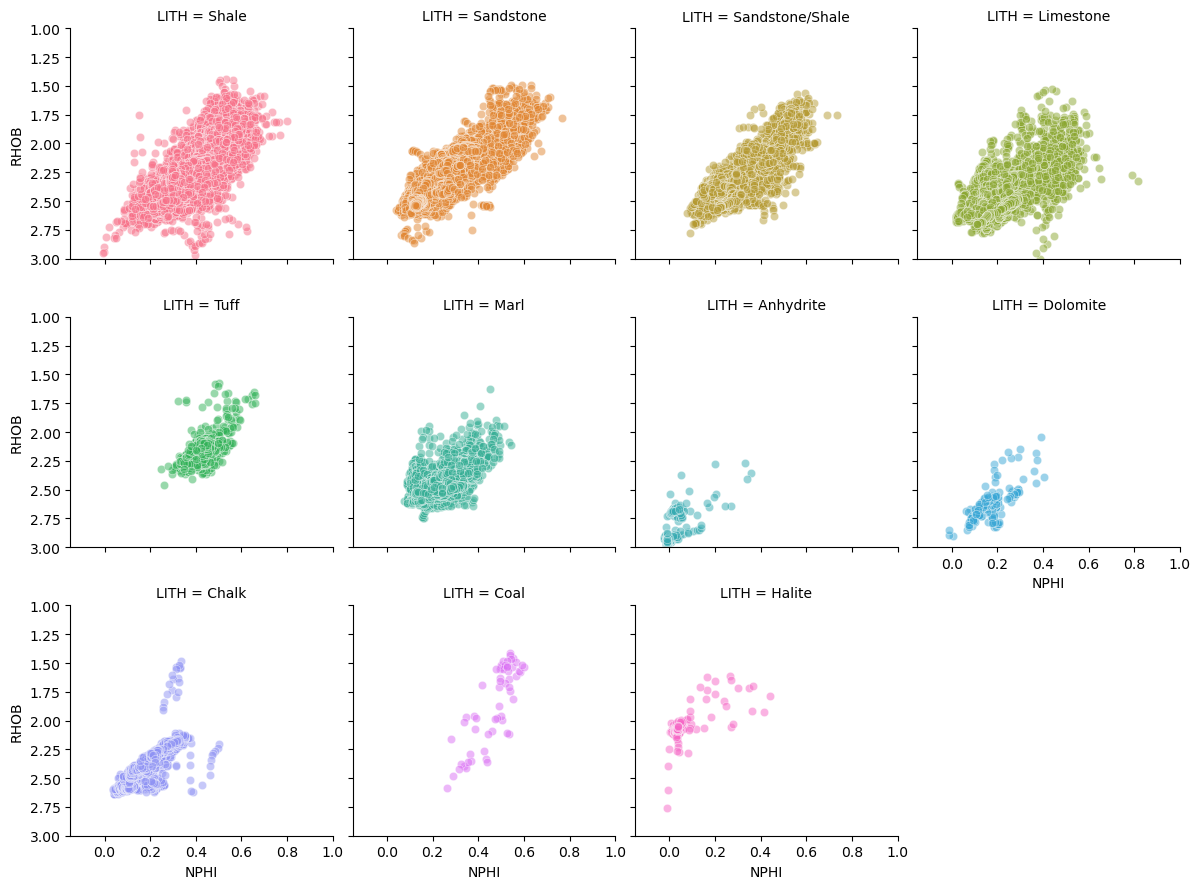

In [20]:
## Calling the facet grid function and giving it the arguments for using our "data" df and
g = sns.FacetGrid(data, 
                  col='LITH', 
                  col_wrap=4, 
                  hue='LITH')  ## color plots by 'LITH"

## Within the facet grid, we want scatter plots, using NPHI and RHOB and adding some transparency to the points with alpha=0.5
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5) 
g.set(xlim=(-0.15, 1)) 
g.set(ylim=(3, 1))

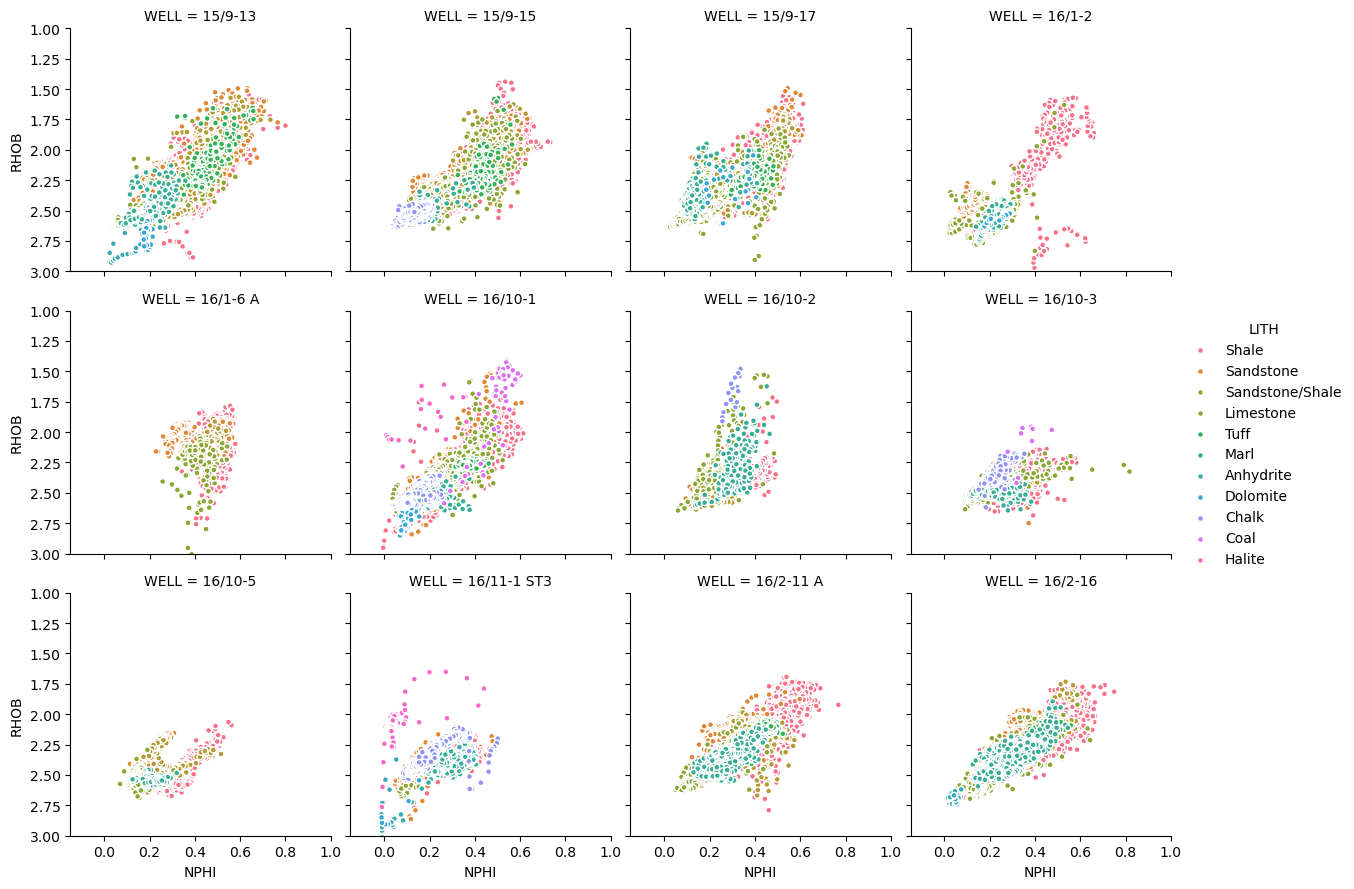

In [21]:
# organizing columns by "WELL"

g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4) 
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='o')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()